#### __Importing Libraries__

In [26]:
# pylint: disable-all

import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 

warnings.filterwarnings('ignore')

#### __Importing Dataset__

In [2]:
path = os.path.join(os.getcwd(), r'dataset\breast-cancer.csv')
data = open(path)
df = pd.read_csv(data)

#### __Dataset Information__

In [4]:
print("df info:\n")
df.info()

df info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

#### __Removal Redundant Columns__

In [5]:
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df = df.drop(['id'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df.shape

(569, 17)

#### __Encoding__

In [7]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0}).astype(int)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### __Correlation Matrix__

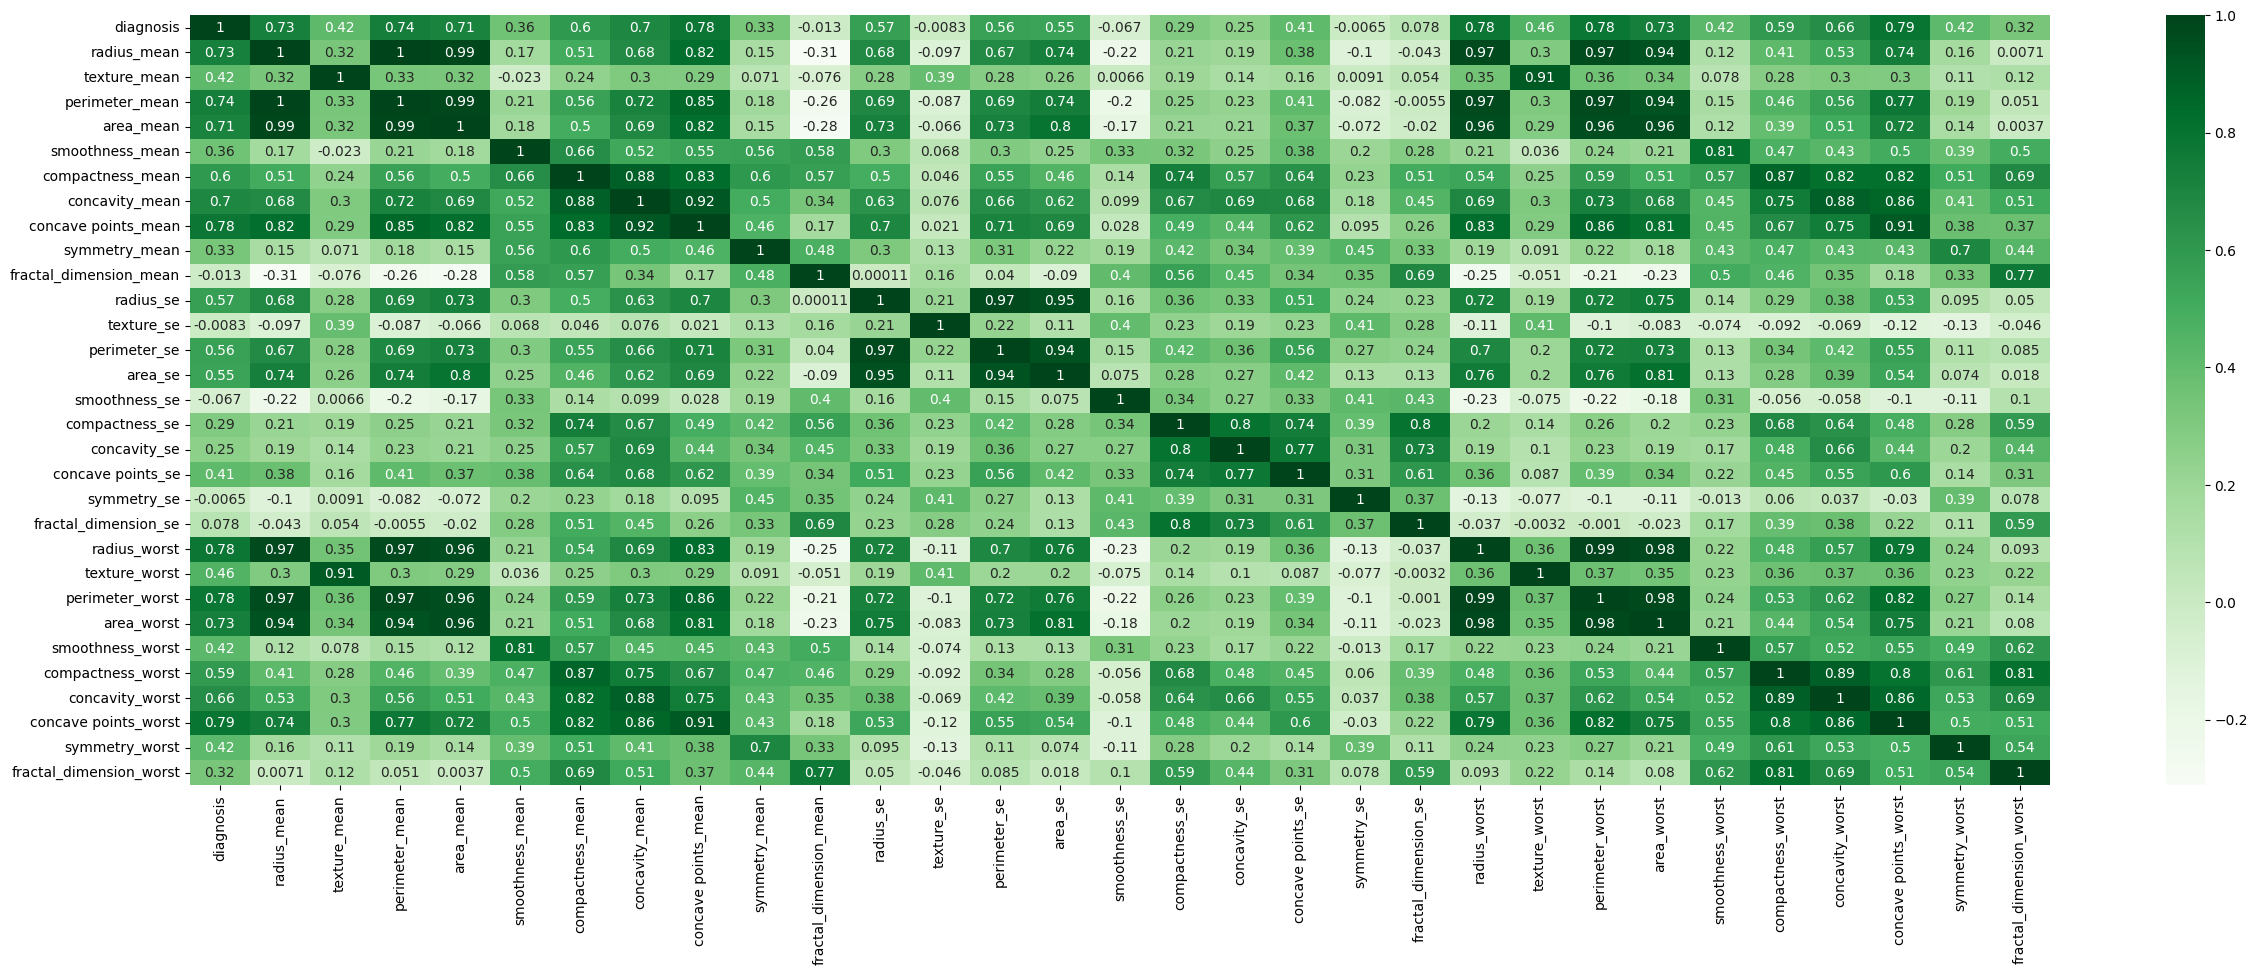

In [9]:
corr = df.corr()
plt.figure(figsize=(30 ,10))
sns.heatmap(corr, cmap="Greens", annot=True)
plt.show()

#### __Correlation Correction__

    Dropping all highly correlated features of the dataset yet maintaing the impacting features of the dataset.

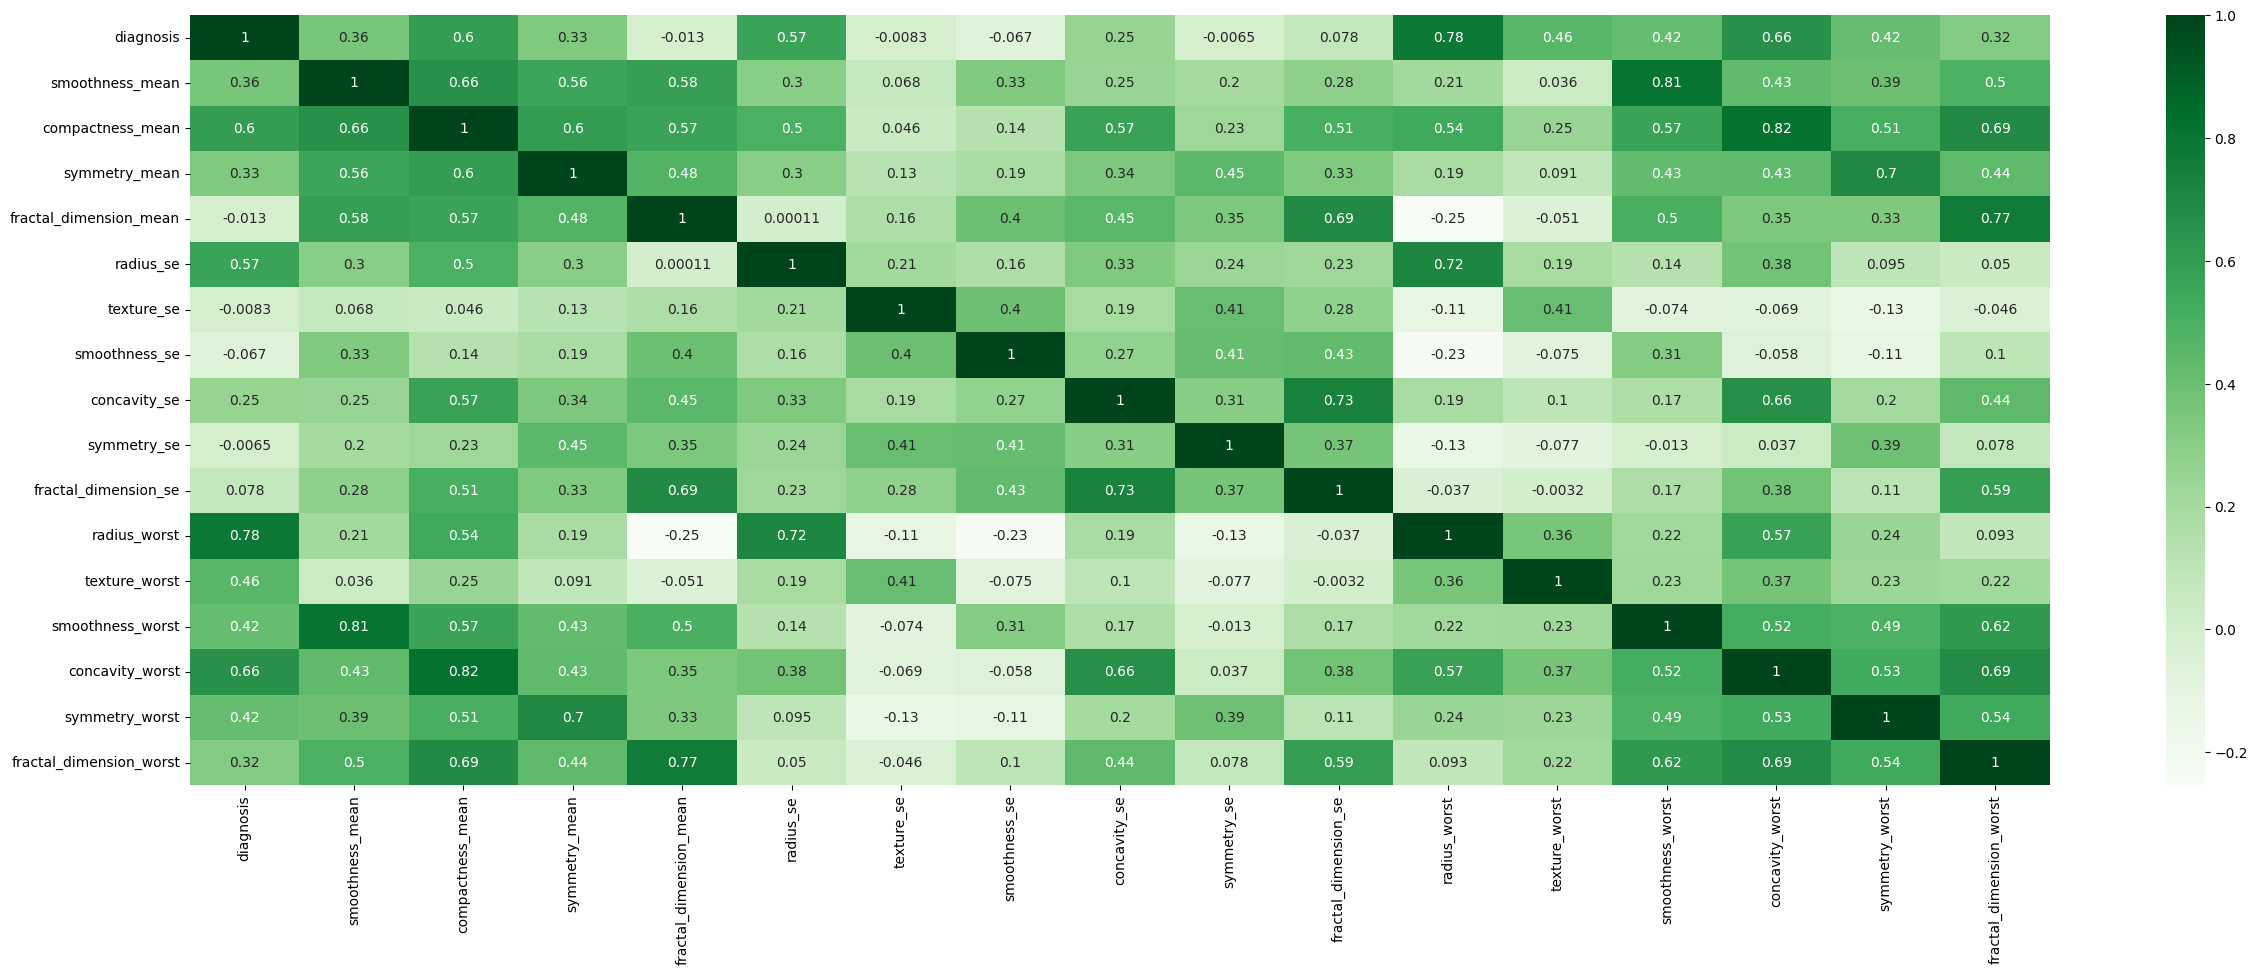

In [10]:
df = df.drop(["radius_mean", "texture_mean", "area_worst", "perimeter_worst", "concave points_worst", "compactness_worst", "area_se", "perimeter_se", "concave points_se", "compactness_se", "area_mean", "perimeter_mean", "concave points_mean", "concavity_mean"], axis=1)

corr = df.corr()
plt.figure(figsize=(30 ,10))
sns.heatmap(corr, cmap="Greens", annot=True)
plt.show()

    Correlation scores with the inference column.

In [11]:
cor=df.corr()
cor.nlargest(30,'diagnosis')['diagnosis']

diagnosis                  1.000000
radius_worst               0.776454
concavity_worst            0.659610
compactness_mean           0.596534
radius_se                  0.567134
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64

In [12]:
df.describe()

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,0.007041,0.031894,0.020542,0.003795,16.269190,25.677223,0.132369,0.272188,0.290076,0.083946
std,0.483918,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,0.003003,0.030186,0.008266,0.002646,4.833242,6.146258,0.022832,0.208624,0.061867,0.018061
min,0.000000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,0.001713,0.000000,0.007882,0.000895,7.930000,12.020000,0.071170,0.000000,0.156500,0.055040
25%,0.000000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.015090,0.015160,0.002248,13.010000,21.080000,0.116600,0.114500,0.250400,0.071460
50%,0.000000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.025890,0.018730,0.003187,14.970000,25.410000,0.131300,0.226700,0.282200,0.080040
75%,1.000000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.042050,0.023480,0.004558,18.790000,29.720000,0.146000,0.382900,0.317900,0.092080
max,1.000000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,0.031130,0.396000,0.078950,0.029840,36.040000,49.540000,0.222600,1.252000,0.663800,0.207500


#### __Splitting the dataset into training and test sets__

In [13]:
X = df.iloc[ : , 1:]
Y = df.iloc[ : , :1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1) # 10 samples for test

# test_size = 0.017 - For 10 samples.

#### __Feature Scaling__

In [27]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### __Logistic Regression__

In [15]:
model = LogisticRegression(random_state = 1)
model.fit(X_train, Y_train.values.ravel())
predict = model.predict(X_test)

print("\nLogistic Regression\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Logistic Regression

Accuracy Score: 97.66%

Confusion Matrix:

[[107   1]
 [  3  60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



#### __Naive Bayes__

In [16]:
model = GaussianNB()
model.fit(X_train, Y_train.values.ravel())
predict = model.predict(X_test)

print("Naive Bayes Classifier\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Naive Bayes Classifier

Accuracy Score: 95.32%

Confusion Matrix:

[[105   3]
 [  5  58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



#### __K-Nearest Neighbours__

In [22]:
model = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train.values.ravel())
predict = model.predict(X_test)

print("K-Nearest Neighbours\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

K-Nearest Neighbours

Accuracy Score: 92.98%

Confusion Matrix:

[[107   1]
 [ 11  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       108
           1       0.98      0.83      0.90        63

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



#### __Decision Tree__

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
model.fit(X_train, Y_train.values.ravel())
predict = model.predict(X_test)

print("Decision Tree Classifier\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Decision Tree Classifier

Accuracy Score: 92.98%

Confusion Matrix:

[[103   5]
 [  7  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       108
           1       0.92      0.89      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



#### __Random Forst Classifier__

In [19]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
model.fit(X_train, Y_train.values.ravel())
predict = model.predict(X_test)

print("Random Forst Classifier\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Random Forst Classifier

Accuracy Score: 94.74%

Confusion Matrix:

[[106   2]
 [  7  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       108
           1       0.97      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#### __Support Vector Machines__

In [23]:
model = SVC(kernel = 'rbf', random_state = 1)
model.fit(X_train, Y_train.values.ravel())
predict = model.predict(X_test)

print("Support Vector Machines\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Support Vector Machines

Accuracy Score: 95.91%

Confusion Matrix:

[[107   1]
 [  6  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

